<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Kaggle Submission Python Jupyter Notebook</h2>
<h4>DAT-5390 | Computational Data Analytics with Python</h4>
Alyssa Brunen - MBAN DD San Francisco Spring 2024<br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>

<h3>Introduction</h3><br>
The main goal of this comprehensive analysis is to build a strong prediction model that accurately represents the complex interactions affecting bike rentals. The dataset under examination includes important data that contributes to the goal variable 'RENTALS,' such as temperature, humidity, wind speed, and other relevant elements. The main goal is to explore the dataset using exploratory data analysis in order to get understanding of the complex interactions between different characteristics. Afterwards, the goal is to improve the model's ability to forecast the future by deliberately designing features that capture important variables like the time of day, the weather, and holidays. <br><br>

<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part I: Imports and Data Check</h2>

In [1]:
## importing libraries ##

# for this template
import numpy             as np                       # mathematical essentials
import pandas            as pd                       # data science essentials
import sklearn.linear_model                          # linear models
from sklearn.model_selection import train_test_split # train/test split
import matplotlib.pyplot as plt # matlab ploting for visualizations
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler  # this and below are 
from sklearn.impute import SimpleImputer                                             # all for the different
from sklearn.compose import ColumnTransformer                                        #sklearn modeling 
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# setting pandas print options (optional)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Load the datasets
train_data = pd.read_excel('train.xlsx')
test_data = pd.read_excel('test.xlsx')
test_data.head(n = 10)

,ID,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay
0,mb_382,2023-09-16 20:59:58.095000,73,70,5.6,9.8,65.7,0.0,0.0,0.00,No,Yes
1,mb_547,2023-09-23 17:59:57.270000,63,39,2.2,2.5,39.0,0.0,0.0,0.21,No,Yes
2,mb_578,2023-09-25 00:59:57.115000,69,54,0.2,8.6,48.6,0.0,0.0,0.00,No,Yes
3,mb_187,2023-09-08 17:59:59.070000,69,43,4.0,6.2,46.9,0.0,0.0,0.26,Yes,Yes
4,mb_227,2023-09-10 09:59:58.870000,75,73,6.9,12.3,64.2,0.0,0.0,2.28,No,Yes
5,mb_476,2023-09-20 18:59:57.625000,63,36,3.1,4.7,34.5,0.0,0.0,0.00,No,Yes
6,mb_395,2023-09-17 09:59:58.030000,68,64,2.7,3.2,57.2,0.0,0.0,0.38,No,Yes
7,mb_520,2023-09-22 14:59:57.405000,83,33,6.5,12.4,48.6,0.0,0.0,2.68,No,Yes
8,mb_1156,2023-10-19 02:59:54.225000,66,82,3.1,6.2,62.6,0.0,0.0,0.00,No,Yes
9,mb_2121,2023-12-20 08:00:00,36,58,2.0,11.7,21.4,0.0,0.0,0.15,No,Yes


In [3]:
# Checking data
train_data.head(n = 10)

,ID,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS
0,mb_1039,2023-10-14 05:59:54.810000,52,81,0.4,2.9,46.4,0.0,0.0,0.00,No,Yes,519
1,mb_1330,2023-10-26 08:59:53.355000,51,53,2.2,NaN,35.2,0.0,0.0,1.01,No,Yes,1251
2,mb_551,2023-09-23 21:59:57.250000,56,49,2.5,3.4,38.8,0.0,0.0,0.00,No,Yes,1685
3,mb_2103,2023-12-19 14:00:00,69,32,9.8,12.4,38.7,0.0,0.0,2.36,No,No,0
4,mb_1430,2023-10-30 12:59:52.855000,53,20,2.9,10.8,12.9,0.0,0.0,1.96,No,Yes,814
5,mb_781,2023-10-03 11:59:56.100000,50,72,4.5,11.7,42.3,0.0,0.0,0.30,No,Yes,731
6,mb_1642,2023-11-30 09:00:00,28,33,2.0,9.6,3.7,0.0,0.0,0.56,No,Yes,800
7,mb_870,2023-10-07 04:59:55.655000,72,70,2.7,8.1,58.6,0.0,0.0,0.00,No,Yes,260
8,mb_1483,2023-11-23 18:00:00,61,41,3.1,12.4,37.2,0.0,0.0,0.06,No,Yes,1699
9,mb_092,2023-09-04 18:59:59.545000,84,54,3.4,12.4,62.8,0.0,0.0,0.05,No,Yes,2085


<br><hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part II: Data Preparation</h2><br>



<br><h3>Missing Value Analysis and Imputation</h3>

In [4]:
## Missing Value Imputation ##
# Check for missing values
print(train_data.isnull().sum())

ID                         0
DateHour                   0
Temperature(F)             0
Humidity(%)                0
Wind speed (mph)           0
Visibility(miles)         63
DewPointTemperature(F)    51
Rainfall(in)               0
Snowfall(in)               0
SolarRadiation(MJ/m2)     80
Holiday                    0
FunctioningDay             0
RENTALS                    0
dtype: int64


<br><h3>Transformations</h3>

In [5]:
## Transformations ##
# Impute missing values using column mean for specific columns
impute_columns = ['Visibility(miles)', 'DewPointTemperature(F)', 'SolarRadiation(MJ/m2)']
for column in impute_columns:
    train_data[column].fillna(train_data[column].mean(), inplace=True)

# Verify that the missing values have been filled
print(train_data.isnull().sum())


ID                        0
DateHour                  0
Temperature(F)            0
Humidity(%)               0
Wind speed (mph)          0
Visibility(miles)         0
DewPointTemperature(F)    0
Rainfall(in)              0
Snowfall(in)              0
SolarRadiation(MJ/m2)     0
Holiday                   0
FunctioningDay            0
RENTALS                   0
dtype: int64


<br><h3>Feature Engineering</h3>

In [6]:
## Feature Engineering ##
# Feature Engineering
# Convert 'DateHour' to datetime, handling parsing errors
train_data['DateHour'] = pd.to_datetime(train_data['DateHour'], errors='coerce')
test_data['DateHour'] = pd.to_datetime(test_data['DateHour'], errors='coerce')

# Create temporal features
train_data['hour'] = train_data['DateHour'].dt.hour
train_data['day_of_week'] = train_data['DateHour'].dt.dayofweek
train_data['month'] = train_data['DateHour'].dt.month
train_data['is_weekend'] = train_data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
# Repeat feature engineering for test_data
test_data['hour'] = test_data['DateHour'].dt.hour
test_data['day_of_week'] = test_data['DateHour'].dt.dayofweek
test_data['month'] = test_data['DateHour'].dt.month
test_data['is_weekend'] = test_data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Separate features and target variable
X = train_data.drop(columns=['ID', 'RENTALS', 'DateHour'])  # Adjust according to your data
y = train_data['RENTALS']

# Preprocessing for numerical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical features
categorical_features = X.select_dtypes(include=['object', 'bool']).columns
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

<br><h3>Feature Engineering Explanation</h3>

*Feature 1: Hour* 

In order to get accurate readings of the data in order to analyze them, one feature that was changed was the Hour. The time of day, in terms of hour of the day, is quite a crucial feature for bike rental companies. One can assume that no bikes were rented outside of business hours, though more bikes were rented during the middle of the day. The reason this assumption is made is also that in the middle of the day, the temperature is usually the best, so more customers would want to be outside. Using this featur4e more accurately helps us with the prediction model. 


*Feature 2: Day of Week* 

Similarly to Feature 1, the day of the week is also a feature that is important in the model. For a bike rental company, the time of week is important as one can assume that mainly all bikes are rented on the weekends, when most have time off work and are available. Changing this feature will help the model to predict when more bikes will be rented. Therefore also help the firm know when they would need to have more bikes on hand to fullfill customer demand. Knowing this, also adds value to the company in the sense of customer satisfaction, knowing that when they rent from this firm, they will be able to receive a bike. 

*Feature 3: Month*

Due to Chicago being known as the 'Windy City' the feature of the specific month is also quite crucial. Chicago is known to also have a very cold winter season with temperaturs of even below -15deg Celcius. While in the summer, the city is known to have extra hot temperatures. With this in mind, the month is important, this information would help the firm to know, when not to provide services in order to save on business costs as well. Having a better defined and engineered feature for the Month will help the model with its prediction purposes. 


*Feature 4: Is_Weekend*

This feature is similar to day of week. Having a further feature engineered weekend feature helps the model and also the business. This feature is making the Is_weekend column into a binary form in order to clearly see which days are on the weekend spectrum. In order to get important insights into the patterns of time in the dataset, a thorough analysis of this feature is necessary to determine the degree to which weekends impact the demand for bike rentals.

<br><h3>Descriptive Statistics</h3>
<br><br>
The main goal of this thorough investigation is to build a strong prediction model that accurately represents the complex interactions affecting bike rentals. The dataset under examination includes important data that contributes to the goal variable 'RENTALS,' such as wind speeds, hours of the day, and also the day of week, and other relevant elements. The main goal is to explore the dataset using exploratory data analysis in order to get understanding of the complex interactions between different characteristics.
An overview of the dataset is given by the descriptive statistics. For every numerical variable, it is crucial to note the values of the mean, standard deviation, minimum, and maximum. The information allows to  grasp the features' magnitude and dispersion, which holds significant importance for the model building.
Candidate models that represent different algorithms will be developed in a rigorous procedure. Subsequently, the effectiveness of each model is evaluated using strict criteria, which ultimately results in the identification of the most effective model for accurately forecasting bike rentals.

In [15]:
# Descriptive statistics
train_data.describe().round(decimals=2) 
#just to see more data for each column 

,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),RENTALS,hour,day_of_week,month,is_weekend
count,1090,1638.00,1638.00,1638.00,1638.00,1638.00,1638.00,1638.00,1638.00,1638.00,1090.00,1090.00,1090.00,1638.00
mean,2023-10-01 14:07:32.109183488,57.34,59.03,3.36,9.60,41.85,0.00,0.00,0.54,828.15,11.48,3.01,9.51,0.19
min,2023-09-01 01:59:59.990000,26.00,13.00,0.00,0.00,-2.20,0.00,0.00,0.00,0.00,0.00,0.00,9.00,0.00
25%,2023-09-16 13:14:58.133750016,47.00,44.00,1.80,7.50,33.40,0.00,0.00,0.00,241.50,5.00,1.00,9.00,0.00
50%,2023-10-01 15:29:56.322500096,57.00,59.00,2.90,11.35,41.85,0.00,0.00,0.02,761.50,12.00,3.00,10.00,0.00
75%,2023-10-16 19:29:54.502500096,67.75,73.00,4.50,12.40,50.90,0.00,0.00,0.88,1203.75,18.00,5.00,10.00,0.00
max,2023-10-31 23:59:52.680000,91.00,97.00,12.80,12.40,71.60,0.71,0.30,3.18,3303.00,23.00,6.00,10.00,1.00
std,NaN,12.92,18.56,2.08,3.44,13.82,0.04,0.02,0.79,657.60,6.95,2.00,0.50,0.39


In [ ]:
# Descriptive statistics
test_data.describe().round(decimals=2)
# to see more data for each column

/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


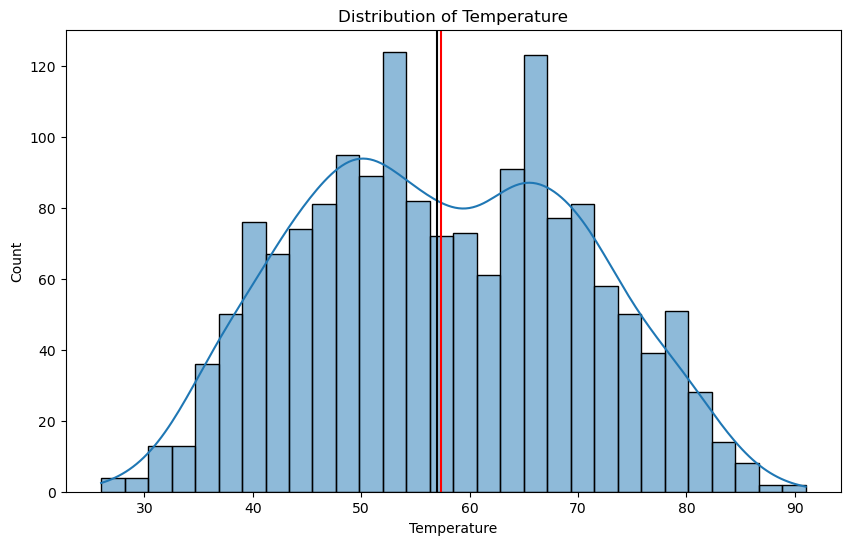

In [8]:
# Visualize distribution of the target variable (number of bike rentals)
plt.figure(figsize=(10, 6))
sns.histplot(train_data["Temperature(F)"], 
             bins=30, 
             kde= True)
plt.title('Distribution of Temperature and Rentals')
plt.xlabel(xlabel = "Temperature") # avoiding using dataset labels
plt.ylabel(ylabel = "Count of Rentals")

plt.axvline(train_data["Temperature(F)"].mean(), color = "red")
plt.axvline(train_data["Temperature(F)"].median(), color = "black")

plt.show()

Above, a histogram was created to show the distribution of rentals with the temperature that they were rented in. As mentioned during the feature engineering section, Chicago is known to have drastic temperature changes throughout the year. With that being said. in this histogram we can see that most bikes were rented when it was roughly 50deg Fahrenheit to 75deg Fahrenheit, which is universally a comfortable temperature to go for a bike ride. Both the minima on either end, such as below 30deg Fahrenheit and above 90deg Fahrenheit saw close to no rentals. This can show to the business that they should consider closing for the day, as they would most likely loose more money when staying open (labor costs for example alone) than from renting less than 10 bikes. 

/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


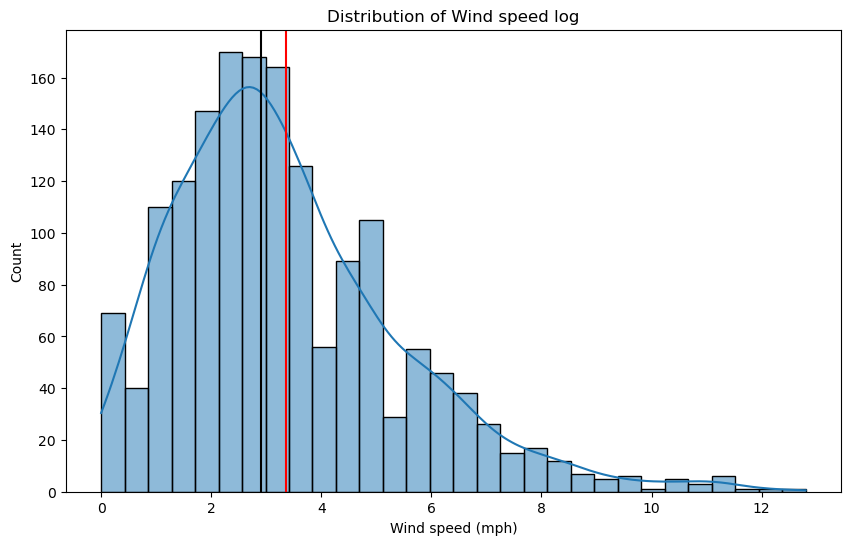

In [11]:
# Visualize distribution of the target variable (number of bike rentals)
plt.figure(figsize=(10, 6))
sns.histplot(train_data["Wind speed (mph)"], 
             bins=30, 
             kde= True)
plt.title('Distribution of Wind speed and Rentals')
plt.xlabel(xlabel = "Wind speed (mph)") # avoiding using dataset labels
plt.ylabel(ylabel = "Count of Rentals")

plt.axvline(train_data["Wind speed (mph)"].mean(), color = "red")
plt.axvline(train_data["Wind speed (mph)"].median(), color = "black")

plt.show()

In addition to the Temperature distribution histogram, a Wind speed histogram distribution was created as well. For a city such as Chicago, not only the temperature has to be considered, but also in the "Windy City" the Wind speed. It is clear to see that the lower the wind speed, the higher the amounnt of bike rentals. Combining the thoughts of both histograms, it is most likely that most bike rentals occured when the temperature was comfortable (between 55-80deg Fahrenheit) while also experiencing a low wind speed. Similar to the temperature histogram this graph yields a lot of valuable insights to the business. 

Both models were created as they will not be used in the modeling section. The reason for this is that both these features (columns) within the dataset clearly show that they have an impact on the rentals, what that means that in reality, when it is cold outside (or too hot), customers will not come. Similarly, when it is too windy, customers will also be less likely to rent a bike. With this in mind, knowing these predictitions already, other features such as weekend (binary), hour (time of day), or the month are a lot more crucial and insightful for the business operations and the model. 

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part III: Candidate Modeling</h2><br>


In [12]:
# Define models
models = {
    'OLS Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(random_state=42),
    'Ridge Regression': Ridge(random_state=42),
    'Elastic Net Regression': ElasticNet(random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42)
}

# Model training and selection
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    # Fit the model
    pipeline.fit(X, y)
    # Predict on training data
    y_pred = pipeline.predict(X)
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    results[name] = rmse

/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future

/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future

<br>
<h3>Model Results</h3><br>


In [13]:
## Model Results ##
# Select the best model based on RMSE
best_model_name = min(results, key=results.get)
best_model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('model', models[best_model_name])])

# Train the best model

# Drop the 'ID' and 'DateHour' columns for prediction as they're not features
X_test = test_data.drop(columns=['ID', 'DateHour'])

# Predict using the best model pipeline
predictions = best_model_pipeline.predict(X_test)


/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/alyssabrunen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future

<h2>Candidate Model Development and Final Model Selection Explanation</h2><br>
Based on the dataset's Root Mean Squared Error (RMSE) performance, this model function above defines, trains, and chooses the optimal regression model from a collection of six distinct kinds. 

To guarantee that the models run on prepared and clean data, each model is encapsulated in a pipeline that has a preprocessing step. In order to calculate the RMSE, a measure of the average size of the errors between projected and actual values, the models are then trained on a dataset (X, y). Predictions are then generated using the same dataset. The RMSE for every model is kept in the results dictionary, which makes it possible to compare the performance of the models. The model used for final forecasts is the one deemed to be the best performer, based on its lowest root mean square error.

The best model is chosen based on the idea that, under the assumption that the test data and training data have comparable distributions, the model with the lowest RMSE on the training set is probably going to perform well on unknown data. This strategy aims to reduce overfitting while preserving strong prediction performance by striking a balance between model complexity and accuracy.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part IV: Preparing Submission File for Kaggle</h2><br>


<h3>Creating the Kaggle File</h3><br>

In [ ]:
# Prepare the submission file
submission_df = pd.DataFrame({'ID': test_data['ID'], 'RENTALS': predictions})
submission_file_path = 'BriCortezSubmission.csv'
submission_df.to_csv(submission_file_path, index=False)

print(f"Submission file saved to: {submission_file_path}")


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part V: Citations</h2><br>

1. OpenAI. (2022). ChatGPT (Dec 20 version) [Large language model]. https://chat.openai.com 
    used for a better explanation of pipelining and RMSE modeling 
2. Why is Chicago called “The windy city”?︱skydeck. Skydeck Chicago. (2022, December 19). https://theskydeck.com/why-is-chicago-called-the-windy-city/ 
3. Chandra, B. (2021, June 18). How do weather and season affect bike rentals?. Medium. https://bobby-js-chandra.medium.com/how-do-weather-and-season-affect-bike-rentals-d26164e3233b 

<br>

<br>